# Load and Explore Dataset


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("data/heart_statlog_cleveland_hungary_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [107]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


# Data Visualisation


## Line Plot

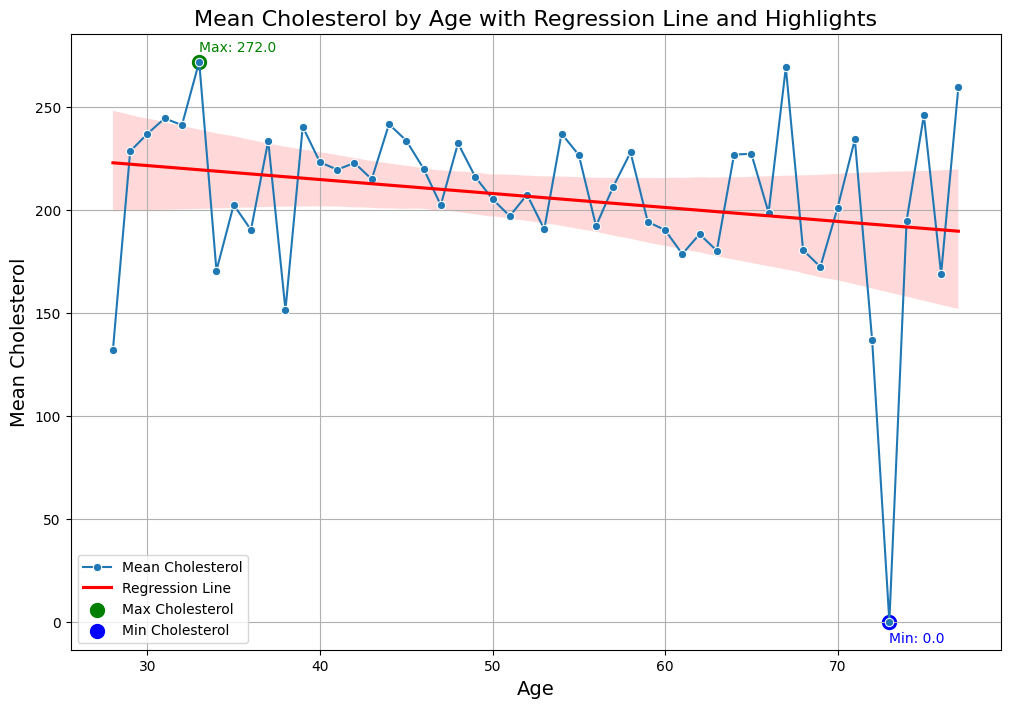

In [108]:
df_line = df.groupby('age')['cholesterol'].mean().reset_index()
plt.figure(figsize=(12, 8))

sns.lineplot(x='age', y='cholesterol', data=df_line, marker='o', label='Mean Cholesterol')

sns.regplot(x='age', y='cholesterol', data=df_line, scatter=False, color='red', label='Regression Line')

max_cholesterol = df_line.loc[df_line['cholesterol'].idxmax()]
min_cholesterol = df_line.loc[df_line['cholesterol'].idxmin()]
plt.scatter(max_cholesterol['age'], max_cholesterol['cholesterol'], color='green', s=100, label='Max Cholesterol')
plt.scatter(min_cholesterol['age'], min_cholesterol['cholesterol'], color='blue', s=100, label='Min Cholesterol')

plt.text(max_cholesterol['age'], max_cholesterol['cholesterol'] + 5, f"Max: {max_cholesterol['cholesterol']:.1f}", color='green')
plt.text(min_cholesterol['age'], min_cholesterol['cholesterol'] - 10, f"Min: {min_cholesterol['cholesterol']:.1f}", color='blue')

plt.title('Mean Cholesterol by Age with Regression Line and Highlights', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mean Cholesterol', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Bar Plot

C:\Users\user\AppData\Local\Temp\ipykernel_11864\3584211310.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


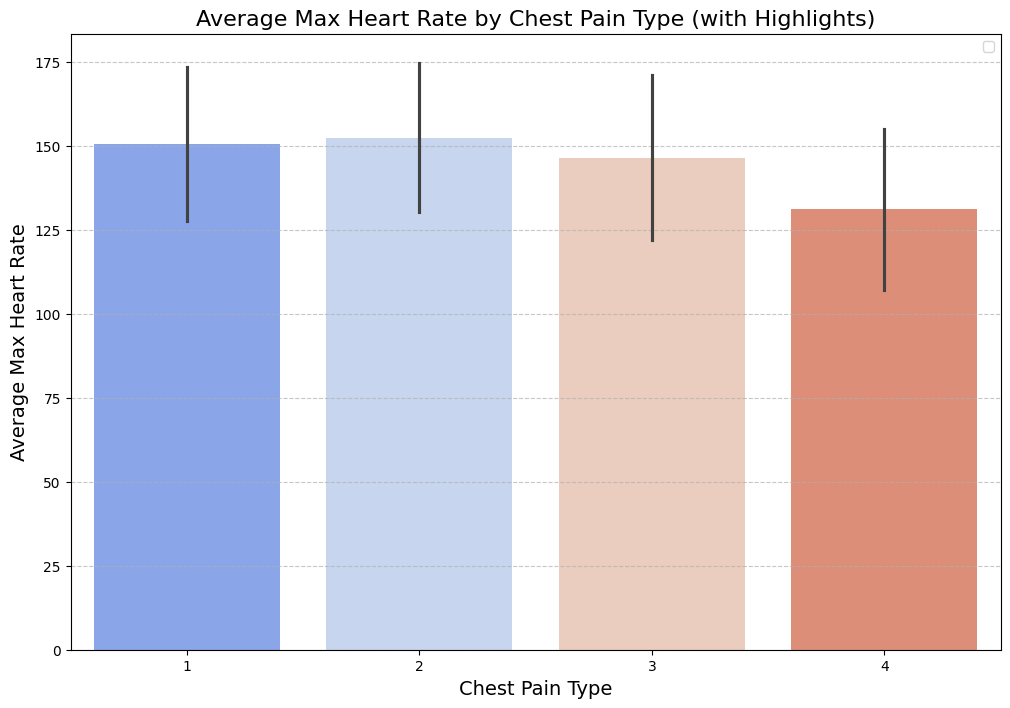

In [109]:
plt.figure(figsize=(12, 8))

sns.barplot(
    x='chest pain type',
    y='max heart rate',
    data=df,
    errorbar='sd' ,
    palette='coolwarm'
)

grouped = df.groupby('chest pain type')['max heart rate'].mean()
max_value = grouped.max()
min_value = grouped.min()
max_type = grouped.idxmax()
min_type = grouped.idxmin()

plt.title('Average Max Heart Rate by Chest Pain Type (with Highlights)', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Average Max Heart Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Scatter Plot

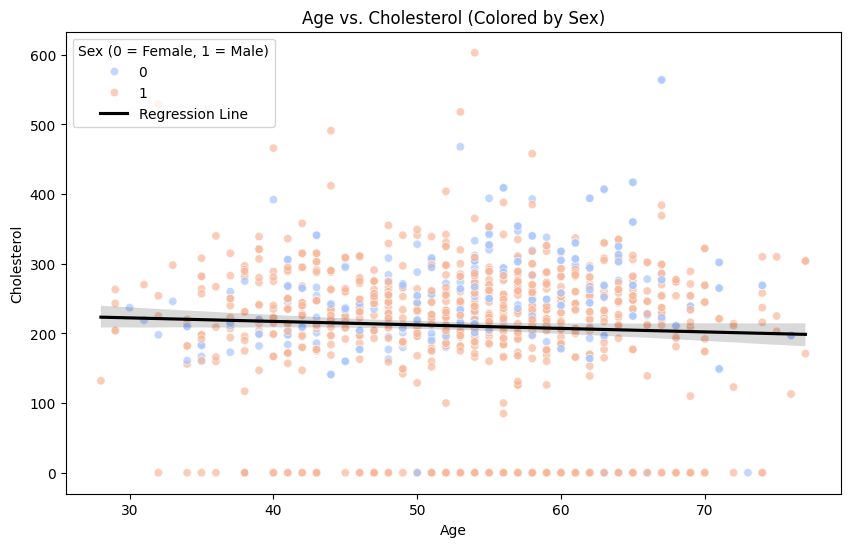

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cholesterol', hue='sex', data=df, palette='coolwarm', alpha=0.7)
sns.regplot(x='age', y='cholesterol', data=df, scatter=False, color='black', label='Regression Line')
plt.title('Age vs. Cholesterol (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Sex (0 = Female, 1 = Male)')
plt.show()

## Error Bars

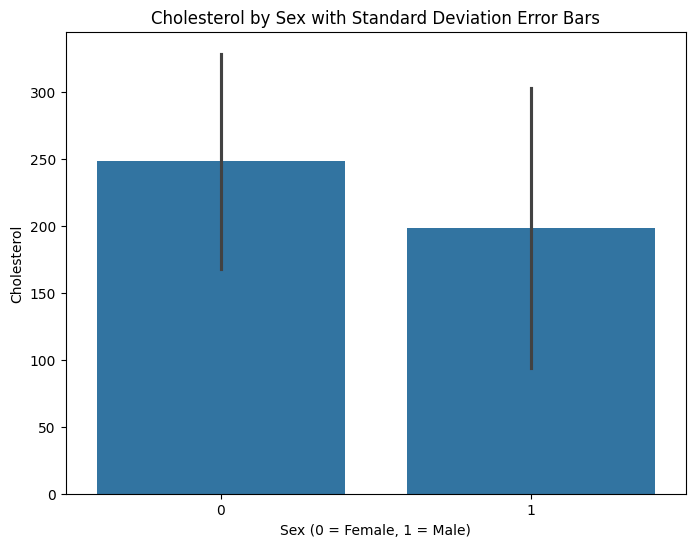

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='cholesterol', data=df, errorbar='sd')
plt.title('Cholesterol by Sex with Standard Deviation Error Bars')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol')
plt.show()

## Contour Plot

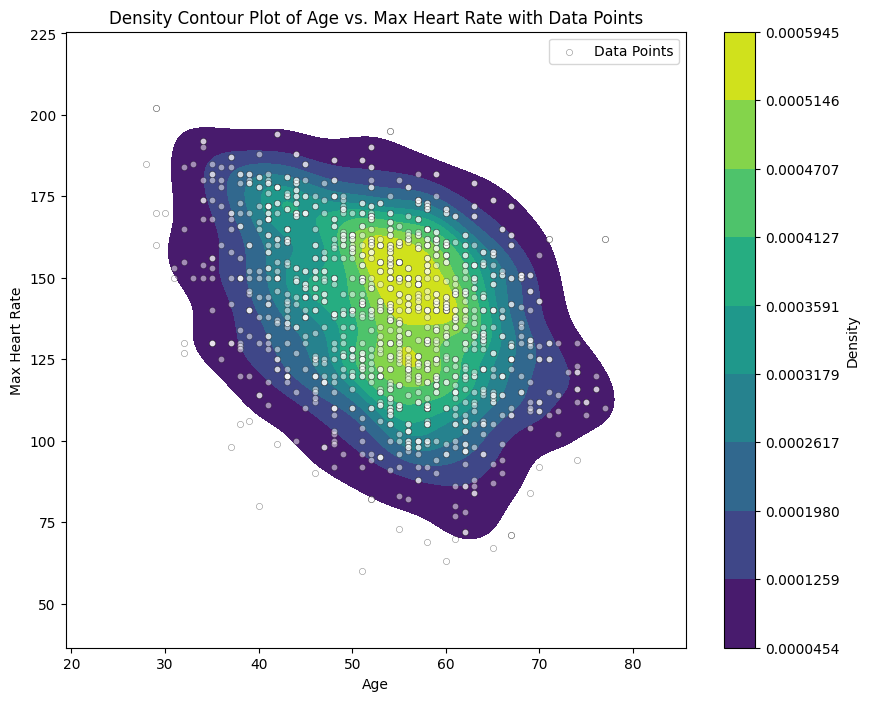

In [112]:
plt.figure(figsize=(10, 8))
kde = sns.kdeplot(
    x='age',
    y='max heart rate',
    data=df,
    fill=True,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Density'}
)
sns.scatterplot(
    x='age',
    y='max heart rate',
    data=df,
    color='white',
    edgecolor='black',
    alpha=0.5,
    s=20,
    label='Data Points'
)
plt.title('Density Contour Plot of Age vs. Max Heart Rate with Data Points')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

## Histogram

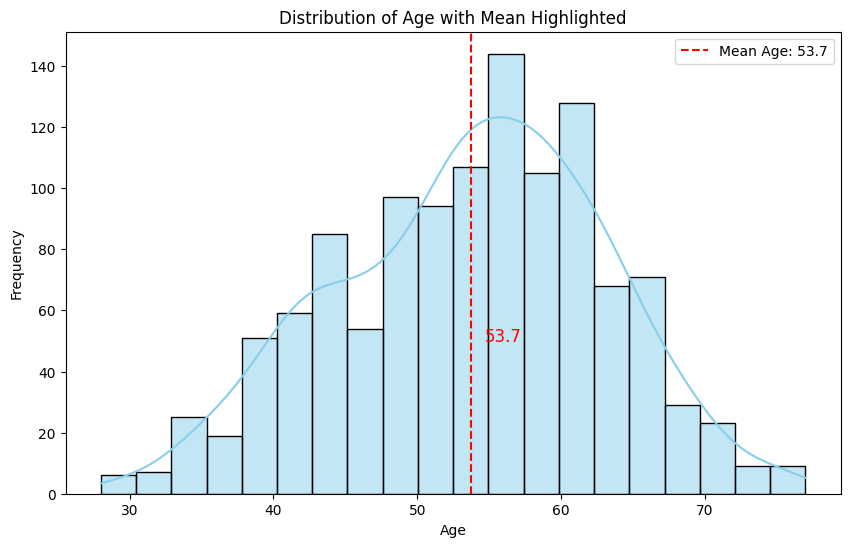

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', edgecolor='black')
mean_age = df['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.1f}')
plt.text(mean_age + 1, 50, f'{mean_age:.1f}', color='red', fontsize=12)
plt.title('Distribution of Age with Mean Highlighted')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## KDE Plot

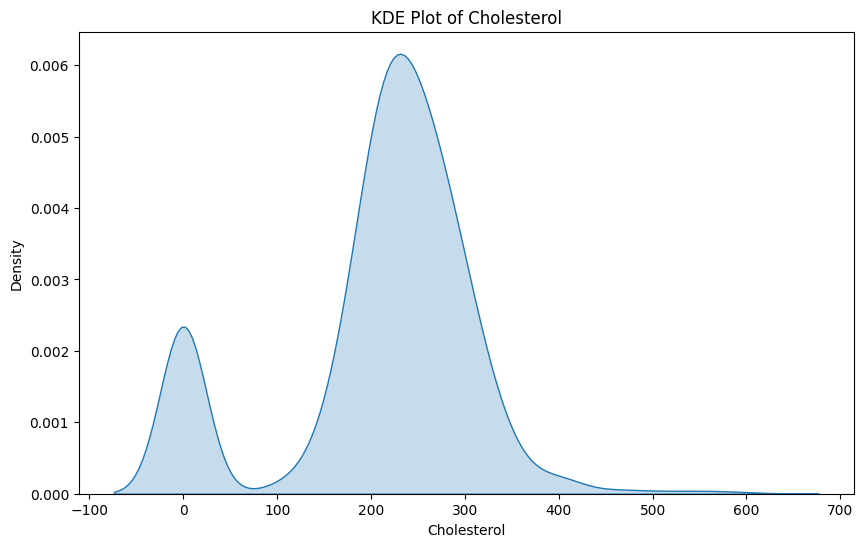

In [114]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['cholesterol'], fill=True)
plt.title('KDE Plot of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

## Joint Plot

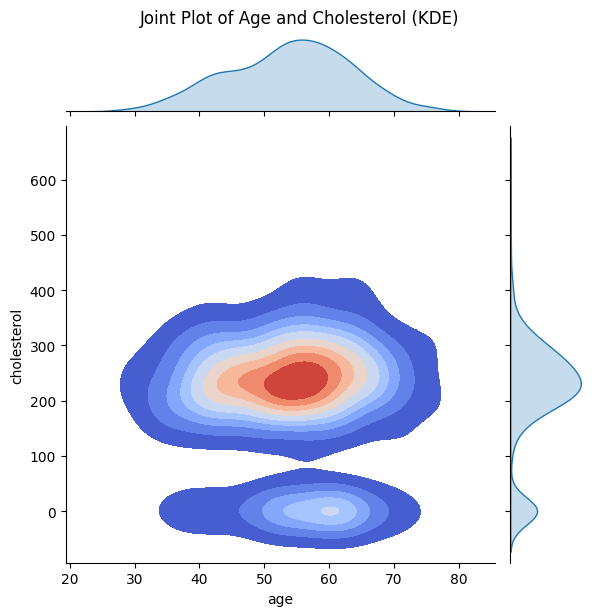

In [115]:
sns.jointplot(x='age', y='cholesterol', data=df, kind='kde', fill=True, cmap='coolwarm')
plt.suptitle('Joint Plot of Age and Cholesterol (KDE)', y=1.02)
plt.show()

## Box Plot

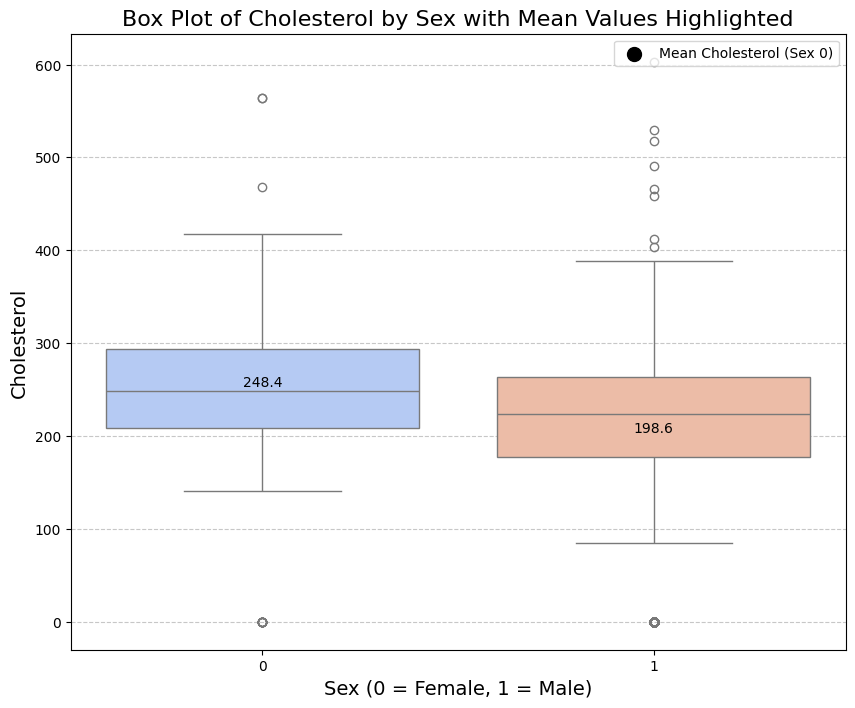

In [116]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='sex', y='cholesterol', data=df, showfliers=True, palette='coolwarm')

mean_cholesterol_by_sex = df.groupby('sex')['cholesterol'].mean()
for sex, mean_value in mean_cholesterol_by_sex.items():
    plt.scatter(sex, mean_value, color='black', s=100, label=f'Mean Cholesterol (Sex {sex})' if sex == 0 else None)

for sex, mean_value in mean_cholesterol_by_sex.items():
    plt.text(sex, mean_value + 5, f'{mean_value:.1f}', color='black', ha='center', fontsize=10)

plt.title('Box Plot of Cholesterol by Sex with Mean Values Highlighted', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Violin Plot

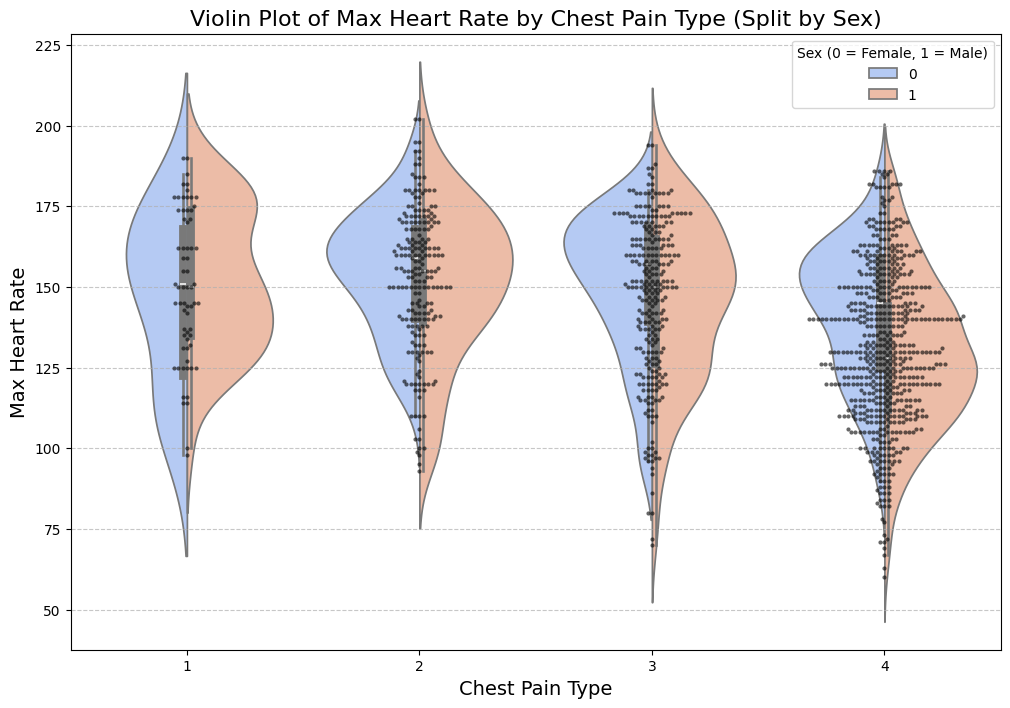

In [117]:
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='chest pain type',
    y='max heart rate',
    hue='sex',
    data=df,
    split=True,
    palette='coolwarm'
)

sns.swarmplot(
    x='chest pain type',
    y='max heart rate',
    data=df,
    color='k',
    alpha=0.6,
    size=3
)

plt.title('Violin Plot of Max Heart Rate by Chest Pain Type (Split by Sex)', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Max Heart Rate', fontsize=14)
plt.legend(title='Sex (0 = Female, 1 = Male)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Implot 

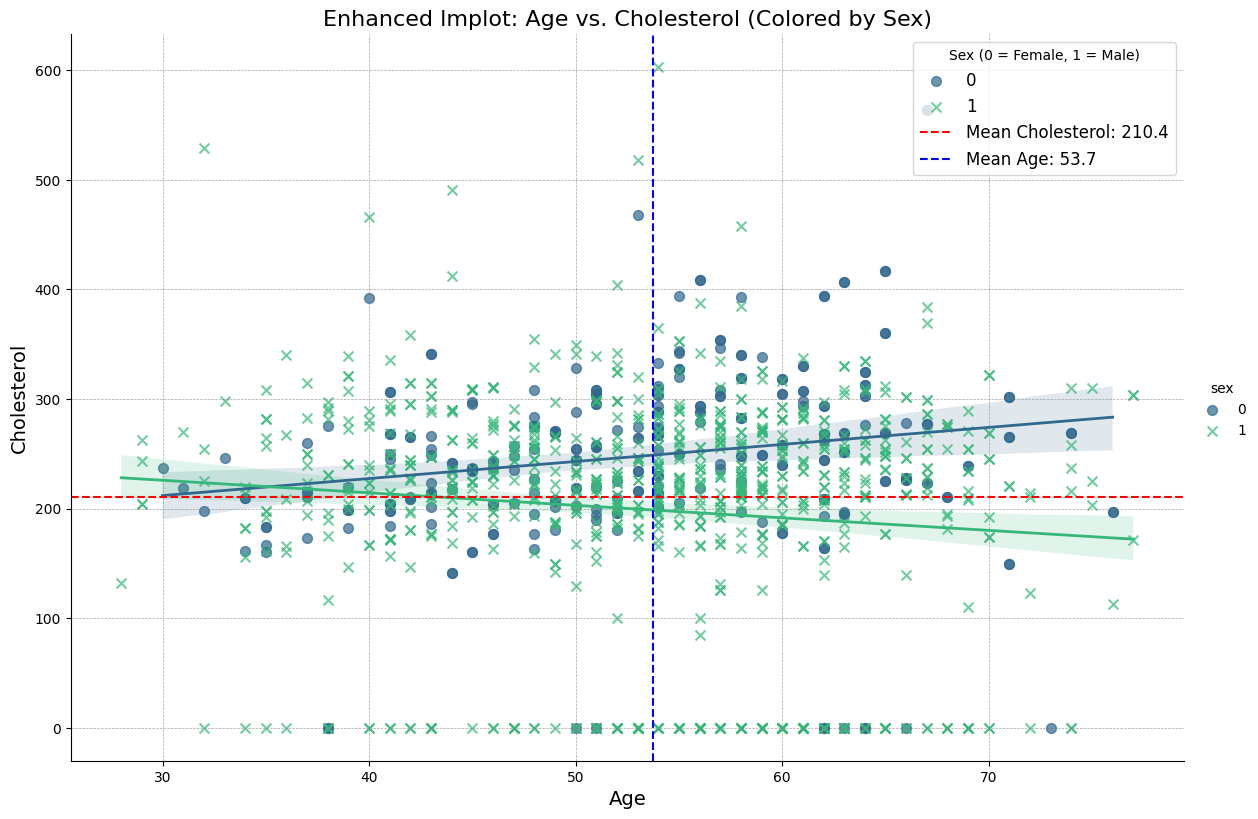

In [118]:
sns.lmplot(
    x='age',
    y='cholesterol',
    hue='sex',
    data=df,
    markers=['o', 'x'],
    palette='viridis',
    height=8,
    aspect=1.5,
    scatter_kws={'alpha': 0.7, 's': 50},
    line_kws={'linewidth': 2}
)

mean_cholesterol = df['cholesterol'].mean()
plt.axhline(mean_cholesterol, color='red', linestyle='--', label=f'Mean Cholesterol: {mean_cholesterol:.1f}')

mean_age = df['age'].mean()
plt.axvline(mean_age, color='blue', linestyle='--', label=f'Mean Age: {mean_age:.1f}')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title('Enhanced lmplot: Age vs. Cholesterol (Colored by Sex)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)

plt.legend(title='Sex (0 = Female, 1 = Male)', loc='upper right', fontsize=12)

plt.show()


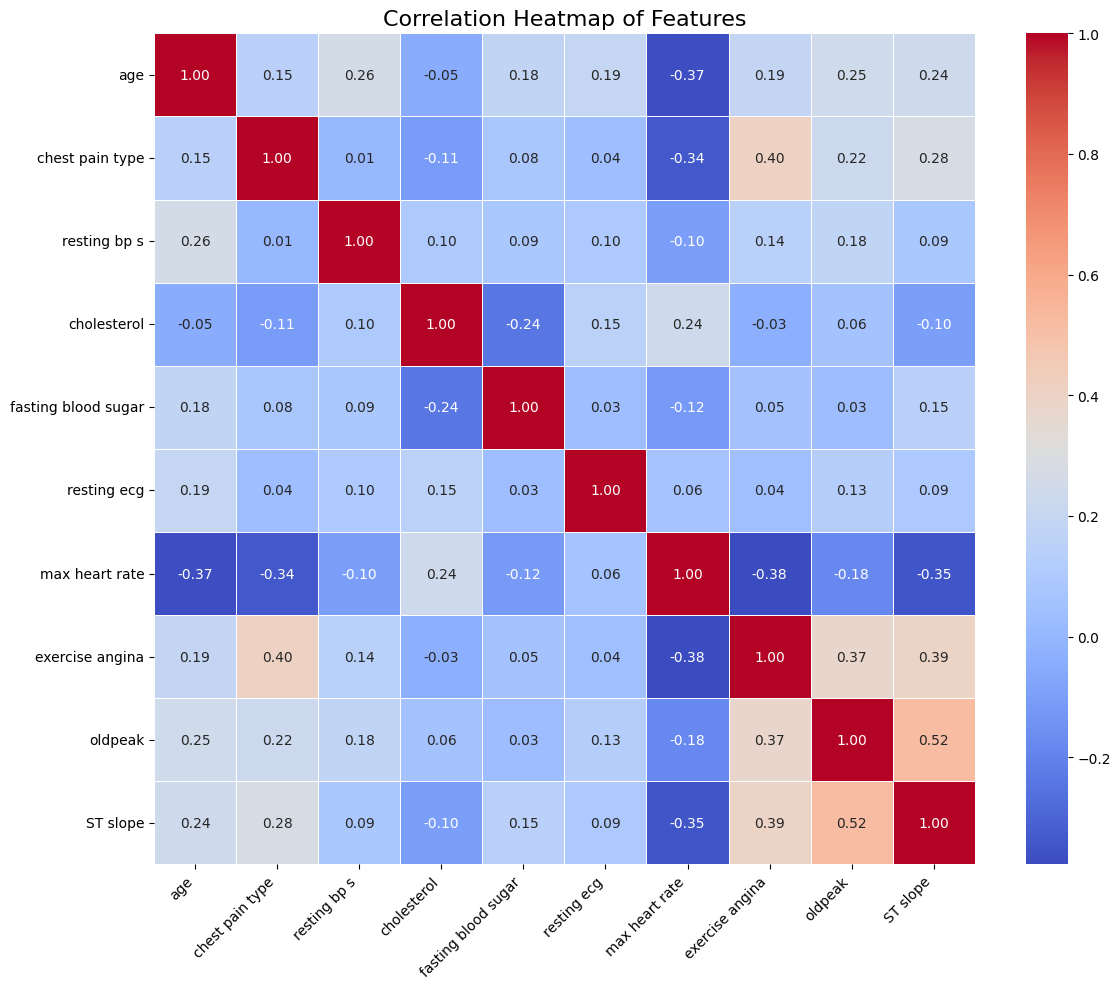

In [119]:
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
# Exclude the mapped label columns if they are numeric (e.g., target_label might be if not mapped)
numerical_df = df[numerical_cols].drop(columns=['target', 'sex'], errors='ignore') # Drop original int codes if labels exist

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

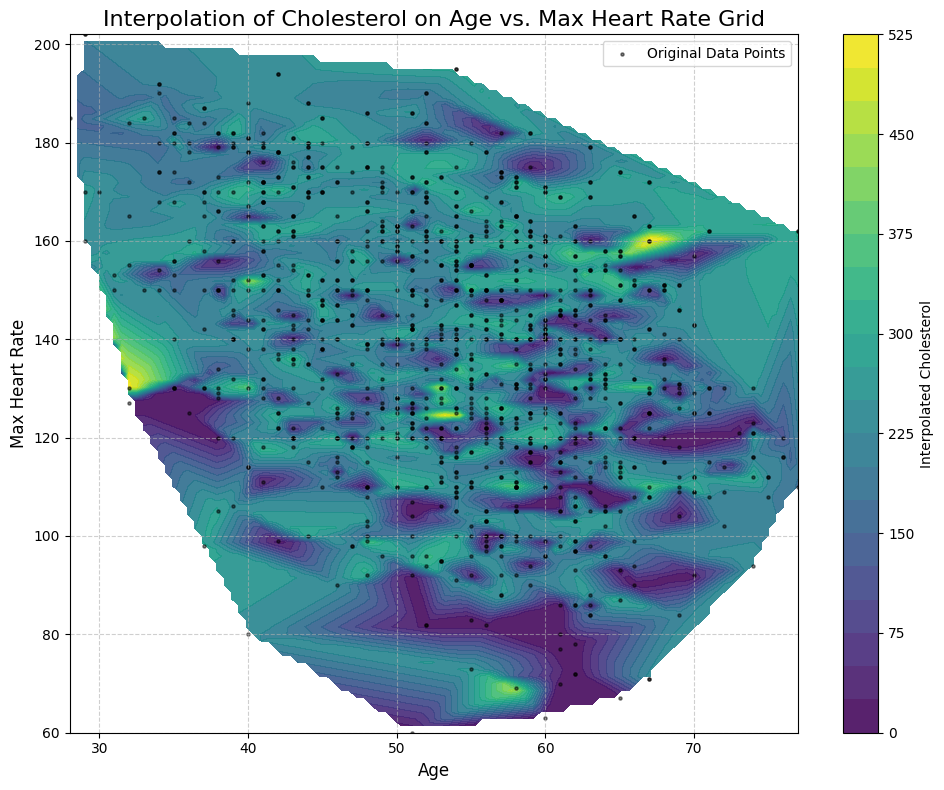

In [124]:

import numpy as np
from scipy.interpolate import griddata

x = df['age'].values
y = df['max heart rate'].values
z = df['cholesterol'].values

points = np.column_stack((x, y))
values = z


grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]

grid_z = griddata(points, values, (grid_x, grid_y), method='linear')

plt.figure(figsize=(10, 8))

contourf_plot = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis', alpha=0.9)
plt.colorbar(contourf_plot, label='Interpolated Cholesterol')

plt.scatter(x, y, c='black', s=5, alpha=0.5, label='Original Data Points')

plt.title('Interpolation of Cholesterol on Age vs. Max Heart Rate Grid', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Max Heart Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion
#### The diverse plots created provided strong insights into the heart disease dataset. Histograms and KDE plots detected feature distributions, scatter and joint plots examined relationships like age vs. cholesterol, and bar, box, and violin plots compared metrics between categorical variables like sex and chest pain type with ease. The correlation heatmap provided a quick overview of feature interdependencies. 
#### Finally, the contour plot interpolated indicated the way in which cholesterol varies with age and max heart rate, giving a smoothed representation of these relationships.
#### From my point of view are many aesthetic but also sophisticated plots that give less insights than simpler one,so make a good choice when you have to do a plot,and choose one that is easier to understand what the data on it represents.